In [35]:
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_rows', 100)

In [36]:
#track_record = pd.read_csv('track_record_count_150_powell_01.csv')
#track_record = pd.read_csv('experiments/track_record_count_200_powell_01_onlydates_with_bets_between80-20_all_time_serie.csv')
#track_record = pd.read_csv('experiments/main_callback.csv')
track_record = pd.read_csv('experiments/parallel_test.csv')
#track_record = pd.read_csv('just_a_test.csv')

#track_record['return2'] = track_record['return'].shift(fill_value=0)-1
#track_record['return2'] = track_record['return'] - 1
#track_record['return3'] = track_record['return'] + track_record['return'].shift(fill_value=0)-1
#track_record['return3'] = track_record['return'] + track_record['return'].shift(fill_value=0)-1
#track_record['return4'] = track_record['return2'].cumsum()

#set_inital = pd.DataFrame({'game_id': ["0000000"], "return": [1]})

#track_record = pd.concat([set_inital, track_record]).reset_index(drop=True)
#track_record['stake'] = track_record['return'].shift(fill_value=1)
#track_record['return_shifted'] = track_record['return'].shift(periods=-1)
track_record

,0,1,2,3,4
0,2738735,0.000000,5,2019-04-27,False
1,2738739,0.000000,5,2019-04-27,False
2,2738740,0.000000,5,2019-04-27,False
3,2740879,0.836394,5,2019-04-28,True
4,2740882,0.000000,5,2019-04-28,True
...,...,...,...,...,...
598,4396165,0.000000,5,2020-12-27,False
599,4396171,0.000000,5,2020-12-27,False
600,4396166,0.000000,5,2020-12-27,False
601,4396167,0.000000,5,2020-12-27,False


In [37]:
track_record.columns = ['game_id',	'return',	'n_bets',	'datetime',	'time_limit_flag']

In [38]:
#count_col = track_record.groupby(['datetime']).count().reset_index()['game_id']
count_col = track_record.groupby(['datetime']).count().reset_index()['game_id']

In [39]:
track_record = track_record.groupby(['datetime'])[['return', 'n_bets']].sum().reset_index()
track_record['count'] = count_col
#track_record = track_record[track_record.datetime>="2019-10-19"]
track_record

,datetime,return,n_bets,count
0,2019-04-27,0.000000,15,3
1,2019-04-28,1.046759,35,7
2,2019-05-01,0.000000,25,5
3,2019-05-02,2.714953,25,5
4,2019-05-04,0.000000,10,2
...,...,...,...,...
132,2020-12-13,4.007859,30,6
133,2020-12-17,0.000000,10,2
134,2020-12-20,8.623196,30,6
135,2020-12-26,0.000000,15,3


In [40]:
track_record[track_record['count']==8].datetime

5      2019-05-05
7      2019-05-12
49     2019-10-13
69     2019-11-24
82     2020-08-16
92     2020-09-06
96     2020-09-13
103    2020-10-04
119    2020-11-08
Name: datetime, dtype: object

In [41]:
print(track_record['return'].corr(track_record['count'], method='kendall'))
print(track_record['return'].corr(track_record['n_bets'],))

0.185931423860581
0.06915401221129389


In [42]:
track_record.groupby(['count']).median() # lower count and lower n_bets implies lower returns?

TypeError: agg function failed [how->median,dtype->object]

In [17]:
# stake = [1]
# current_stake = 1
# for i in track_record['return']:
#     current_stake = (current_stake-1) + 1*i
#     stake.append(current_stake)

# stake

In [43]:
stake = [1]
current_stake = 1
percentage = 0.10
for i in track_record['return']:

    preserved_stake = current_stake * (1-percentage)
    bet_stake = current_stake*percentage
    current_stake = preserved_stake + bet_stake*i

    print(current_stake)

    stake.append(current_stake)

0.9
0.9042083464614368
0.8137875118152931
0.9533482691702817
0.8580134422532536
0.8804742607397453
1.30522876679368
1.408229455539302
1.3580667037978016
1.4805629436255725
1.3325066492630153
1.1992559843367139
1.0793303859030425
0.9713973473127383
0.8742576125814645
0.7868318513233181
0.7081486661909864
0.693500870431527
1.254571535688715
1.3220555043588984
1.8486598794066895
1.6637938914660206
1.4974145023194185
1.3476730520874767
1.212905746878729
1.5161045209616884
1.7449318493895136
1.732641350955569
1.559377215860012
2.581860385629131
2.6268607822640324
2.597672057801698
2.337904852021528
2.338515469432878
2.442099409343011
2.691802990027181
2.422622691024463
2.1803604219220167
1.962324379729815
1.9818110600882872
2.2373135273048788
2.013582174574391
1.8122239571169518
1.6310015614052567
1.7265263602929766
1.5538737242636789
1.398486351837311
1.8221813010114896
1.88772970211154
1.9448717678247758
1.7503845910422982
1.5753461319380684
1.4178115187442615
2.494296778909881
2.24486710

In [44]:
my_df = pd.DataFrame({'date': ['0'] + list(track_record.datetime),
                      'return': [0] + list(track_record['return']),
                      'count': [0] + list(count_col),
                      'n_bets': [0] + list(track_record.n_bets),
                      'stake':stake})
my_df


,date,return,count,n_bets,stake
0,0,0.000000,0,0,1.000000
1,2019-04-27,0.000000,3,15,0.900000
2,2019-04-28,1.046759,7,35,0.904208
3,2019-05-01,0.000000,5,25,0.813788
4,2019-05-02,2.714953,5,25,0.953348
...,...,...,...,...,...
133,2020-12-13,4.007859,6,30,2.917268
134,2020-12-17,0.000000,2,10,2.625541
135,2020-12-20,8.623196,6,30,4.627043
136,2020-12-26,0.000000,3,15,4.164339


In [45]:
my_df[my_df.stake == my_df.stake.max()]

,date,return,count,n_bets,stake
63,2019-11-06,9.79161,2,10,4.640874


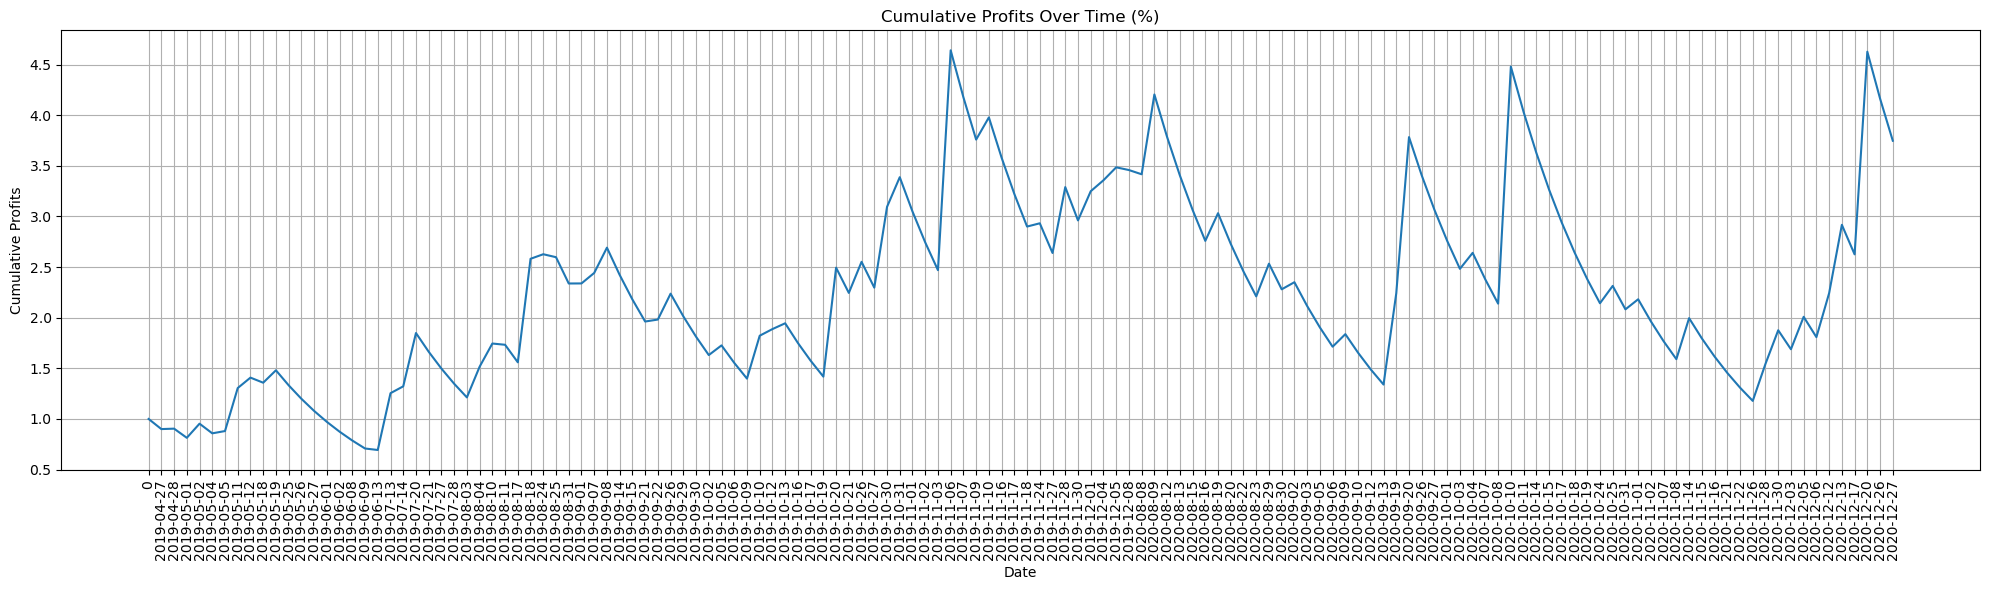

In [46]:
# Create a line plot
plt.figure(figsize=(20, 6))
plt.plot(['0'] + list(track_record.datetime), stake, linestyle='-')
plt.title('Cumulative Profits Over Time (%)')
plt.xlabel('Date')
plt.ylabel('Cumulative Profits')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

In [14]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Sample data
# x = np.arange(1, 11)
# line_data = np.random.rand(10) * 10
# bar_data = np.random.rand(10) * 20

# # Create the figure and axes
# fig, ax1 = plt.subplots()

# # Create the first y-axis (left)
# ax1.plot(['0'] + list(track_record.datetime), stake, color='b', label='Line Plot')
# ax1.set_xlabel('X-axis')
# ax1.set_ylabel('Line Plot Y-axis', color='b')
# ax1.tick_params(axis='y', labelcolor='b')

# # Create the second y-axis (right)
# ax2 = ax1.twinx()
# ax2.bar(['0'] + list(track_record.datetime), [0] + list(track_record.n_bets), alpha=0.5, color='r', label='Bar Plot')
# ax2.set_ylabel('Bar Plot Y-axis', color='r')
# ax2.tick_params(axis='y', labelcolor='r')

# # Legend and Title
# ax1.legend(loc='upper left')
# ax2.legend(loc='upper right')
# plt.title('Line Plot and Bar Plot with Two Y-Axes')
# plt.xticks(rotation=45)
# # Display or Save the Plot
# plt.show()
